# Text classification

Using the dataset `dataset_emails.csv` (or other dataset of your choice) create three text classificators:
* Using rule-based approach (regex)
* Using naive-bayes
* Using Spacy 3 

Finally, compare the results and show what is better and why. 

rule based approach (regex)

In [48]:
import pandas as pd

# Cargar datos desde el archivo CSV
data = pd.read_csv('dataset_emails.csv')

# Obtener las etiquetas únicas de la columna 'label'
unique_labels = data['label'].unique()

# Imprimir las etiquetas
print("Etiquetas encontradas:")
for label in unique_labels:
    print(label)

Etiquetas encontradas:
send
list
trash
read
reply
untrash
forward
star
trash_list
unknown


In [49]:
import re
import pandas as pd

# Cargar datos desde el CSV
data = pd.read_csv('dataset_emails.csv')

# Diccionario de reglas basadas en expresiones regulares para cada etiqueta
regex_rules = {
    'send': re.compile(r'\b(send|compose|draft|shoot)\b', re.IGNORECASE),
    'list': re.compile(r'\b(list|mailing list|contacts)\b', re.IGNORECASE),
    'trash': re.compile(r'\b(trash|delete|remove|discard)\b', re.IGNORECASE),
    'read': re.compile(r'\b(read|open|view)\b', re.IGNORECASE),
    'reply': re.compile(r'\b(reply|respond|answer)\b', re.IGNORECASE),
    'untrash': re.compile(r'\b(untrash|restore|recover)\b', re.IGNORECASE),
    'forward': re.compile(r'\b(forward|fwd)\b', re.IGNORECASE),
    'star': re.compile(r'\b(star|favorite|flag)\b', re.IGNORECASE),
    'trash_list': re.compile(r'\b(trash\s+list|list\s+trash)\b', re.IGNORECASE)
}

def classify_text(text):
    """
    Recorre las reglas definidas y retorna la etiqueta correspondiente
    en cuanto se encuentra una coincidencia en el texto.
    Si ninguna regla coincide, retorna 'unknown'.
    """
    for label, pattern in regex_rules.items():
        if pattern.search(text):
            return label
    return 'unknown'

# Evaluar el clasificador basado en reglas en todo el dataset
correct = 0
for idx, row in data.iterrows():
    prompt = row['prompt']
    true_label = row['label']
    pred_label = classify_text(prompt)
    if pred_label == true_label:
        correct += 1

accuracy = correct / len(data)
print(f"Test Accuracy: {accuracy:.2f}")

# Probar el clasificador con algunos ejemplos
examples = [
    "Can you compose an email for me?",
    "Please reply to the sender.",
    "Forward this message to John.",
    "Open the email to read its content.",
    "Delete this email and trash it."
]

print("\nPredicciones de ejemplo:")
for example in examples:
    print(f"Input: {example} -> Predicted Label: {classify_text(example)}")


Test Accuracy: 0.39

Predicciones de ejemplo:
Input: Can you compose an email for me? -> Predicted Label: send
Input: Please reply to the sender. -> Predicted Label: reply
Input: Forward this message to John. -> Predicted Label: forward
Input: Open the email to read its content. -> Predicted Label: read
Input: Delete this email and trash it. -> Predicted Label: trash


Naive-Bayes

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('dataset_emails.csv')
X = data['prompt']
y = data['label']

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [5]:
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)

MultinomialNB()

In [6]:
y_pred = model.predict(X_test_vectorized)


Accuracy: 78.5%


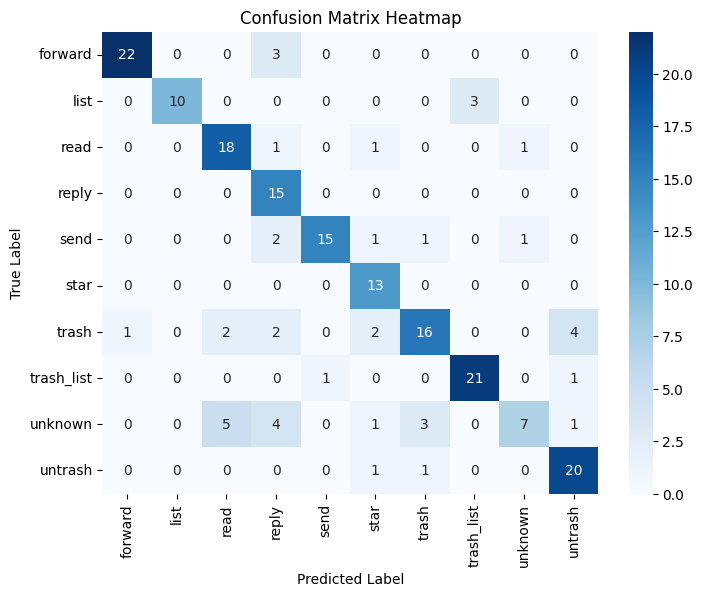

In [20]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy *100}%')

class_labels = np.unique(y_test)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [22]:
user_input = ("Give me money inmediately")

user_input_vectorized = vectorizer.transform([user_input])
predicted_label = model.predict(user_input_vectorized)
print(f"The input text belongs to the '{predicted_label[0]}' category.")

The input text belongs to the 'list' category.


Spacy

In [24]:
!pip install spacy


  Using cached pydantic-2.10.6-py3-none-any.whl.metadata (30 kB)
   ---------------------------------------- 0.0/12.2 MB ? eta -:--:--
   -- ------------------------------------- 0.8/12.2 MB 5.6 MB/s eta 0:00:03
   ------- -------------------------------- 2.4/12.2 MB 6.1 MB/s eta 0:00:02
   ------------- -------------------------- 4.2/12.2 MB 7.4 MB/s eta 0:00:02
   -------------------- ------------------- 6.3/12.2 MB 7.9 MB/s eta 0:00:01
   ----------------------------- ---------- 8.9/12.2 MB 8.8 MB/s eta 0:00:01
   -------------------------------------- - 11.8/12.2 MB 9.6 MB/s eta 0:00:01
   ---------------------------------------- 12.2/12.2 MB 9.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 2.0/2.0 MB 12.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/632.6 kB ? eta -:--:--
   --------------------------------------- 632.6/632.6 kB 12.0 MB/s eta 0:00:00
   ------------------------

In [25]:

!python -m spacy download en

⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ----- ---------------------------------- 1.8/12.8 MB 11.2 MB/s eta 0:00:01
     ------------- -------------------------- 4.5/12.8 MB 11.7 MB/s eta 0:00:01
     ------------------- -------------------- 6.3/12.8 MB 10.7 MB/s eta 0:00:01
     -------------------------- ------------- 8.4/12.8 MB 10.2 MB/s eta 0:00:01
     -------------------------------- ------ 10.7/12.8 MB 10.5 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 10.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [44]:
import spacy
from spacy.pipeline.textcat import Config, single_label_cnn_config
from sklearn.model_selection import train_test_split

In [47]:
import spacy
import pandas as pd
from spacy.pipeline.textcat import Config, single_label_cnn_config
from sklearn.model_selection import train_test_split

# Cargar datos
data = pd.read_csv('dataset_emails.csv')

# Dividir en entrenamiento y prueba
train_data, test_data = train_test_split(data.values.tolist(), test_size=0.2, random_state=42)

# Cargar modelo base de spaCy
nlp = spacy.blank("en")
config = Config().from_str(single_label_cnn_config)
textcat = nlp.add_pipe("textcat", config=config)

# Agregar todas las etiquetas únicas al clasificador
labels = set(label for _, label in train_data)
for label in labels:
    textcat.add_label(label)

# Preparar los datos de entrenamiento
def create_training_data(data):
    texts, labels = zip(*data)
    return list(zip(texts, [{"cats": {lbl: lbl == label for lbl in labels}} for label in labels]))

train_examples = [spacy.training.Example.from_dict(nlp.make_doc(text), annotation) for text, annotation in create_training_data(train_data)]

# Entrenar el modelo
nlp.initialize()
for epoch in range(10):
    losses = {}
    nlp.update(train_examples, losses=losses)
    print(f"Epoch {epoch + 1}, Loss: {losses}")

# Evaluar el modelo
def evaluate_model(model, test_data):
    correct = 0
    for text, label in test_data:
        doc = model(text)
        pred_label = max(doc.cats, key=doc.cats.get)
        if pred_label == label:
            correct += 1
    accuracy = correct / len(test_data)
    print(f"Test Accuracy: {accuracy:.2f}")

evaluate_model(nlp, test_data)

# Función de predicción
def classify_text(text):
    doc = nlp(text)
    return max(doc.cats, key=doc.cats.get)

# Probar predicciones
examples = ["I need to compose an email.", "Write a new message."]
for example in examples:
    print(f"Input: {example} -> Predicted Label: {classify_text(example)}")


Epoch 1, Loss: {'textcat': 0.0899999812245369}
Epoch 2, Loss: {'textcat': 0.08976492285728455}
Epoch 3, Loss: {'textcat': 0.08925535529851913}
Epoch 4, Loss: {'textcat': 0.08843477070331573}
Epoch 5, Loss: {'textcat': 0.08729571849107742}
Epoch 6, Loss: {'textcat': 0.08581390231847763}
Epoch 7, Loss: {'textcat': 0.08396714925765991}
Epoch 8, Loss: {'textcat': 0.08174733817577362}
Epoch 9, Loss: {'textcat': 0.07917585968971252}
Epoch 10, Loss: {'textcat': 0.0762953981757164}
Test Accuracy: 0.57
Input: I need to compose an email. -> Predicted Label: send
Input: Write a new message. -> Predicted Label: send
